# Employee Attrition Prediction

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.feature_selection import f_regression, f_classif, mutual_info_regression, SelectKBest
from scipy.stats import uniform, randint
import joblib
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.feature_selection import SelectKBest, f_classif, chi2, mutual_info_classif
from scipy.stats import kendalltau
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from category_encoders import TargetEncoder


---
## 1. Data Preparation and Exploration
---

In [2]:
Train_Data = pd.read_csv('Data/aug_train.csv')
Test_Data = pd.read_csv('Data/aug_test.csv')
sample_submission_Data = pd.read_csv('Data/sample_submission.csv')

In [3]:
print("Rows count in Train Data: ", Train_Data.shape[0])

print("\n\n\nTrain Data Head: \n")
print(Train_Data.head())

print("\n\n\nTrain Data Info: \n")
print(Train_Data.info())

print("\n\nMissing values:\n" )
print(Train_Data.isnull().sum())

print("\n\nTrain Data Description: \n")
print(Train_Data.describe())

Rows count in Train Data:  19158



Train Data Head: 

   enrollee_id      city  city_development_index gender  \
0         8949  city_103                   0.920   Male   
1        29725   city_40                   0.776   Male   
2        11561   city_21                   0.624    NaN   
3        33241  city_115                   0.789    NaN   
4          666  city_162                   0.767   Male   

       relevent_experience enrolled_university education_level  \
0  Has relevent experience       no_enrollment        Graduate   
1   No relevent experience       no_enrollment        Graduate   
2   No relevent experience    Full time course        Graduate   
3   No relevent experience                 NaN        Graduate   
4  Has relevent experience       no_enrollment         Masters   

  major_discipline experience company_size    company_type last_new_job  \
0             STEM        >20          NaN             NaN            1   
1             STEM         15        50-99 

In [4]:
print("Rows count in Test Data: ", Test_Data.shape[0])

print("\n\n Test Data Info: \n")
print(Test_Data.info())

print("\n\nMissing values:\n" )
print(Test_Data.isnull().sum())

print("\n\n Test Data Description: \n")
print(Test_Data.describe())

Rows count in Test Data:  2129


 Test Data Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             2129 non-null   int64  
 1   city                    2129 non-null   object 
 2   city_development_index  2129 non-null   float64
 3   gender                  1621 non-null   object 
 4   relevent_experience     2129 non-null   object 
 5   enrolled_university     2098 non-null   object 
 6   education_level         2077 non-null   object 
 7   major_discipline        1817 non-null   object 
 8   experience              2124 non-null   object 
 9   company_size            1507 non-null   object 
 10  company_type            1495 non-null   object 
 11  last_new_job            2089 non-null   object 
 12  training_hours          2129 non-null   int64  
dtypes: float64(1), int64(2), object(10)
memor

In [5]:
print("Rows count in Sample Data: ", sample_submission_Data.shape[0])

print("\n\n\n Sample Data Info: \n")
print(sample_submission_Data.info())

print("\n\n Missing values:\n" )
print(sample_submission_Data.isnull().sum())

print("\n\n Sample Data Description: \n")
print(sample_submission_Data.describe())

Rows count in Sample Data:  2129



 Sample Data Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   enrollee_id  2129 non-null   int64  
 1   target       2129 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 33.4 KB
None


 Missing values:

enrollee_id    0
target         0
dtype: int64


 Sample Data Description: 

        enrollee_id  target
count   2129.000000  2129.0
mean   16861.614843     0.5
std     9576.846029     0.0
min        3.000000     0.5
25%     8562.000000     0.5
50%    16816.000000     0.5
75%    25129.000000     0.5
max    33353.000000     0.5


In [6]:
Train_Data['gender'].value_counts()

gender
Male      13221
Female     1238
Other       191
Name: count, dtype: int64

In [7]:
Train_Data['gender'] = Train_Data['gender'].fillna("Unknown")
Test_Data['gender'] = Test_Data['gender'].fillna("Unknown")

In [8]:
Train_Data['gender'].value_counts()

gender
Male       13221
Unknown     4508
Female      1238
Other        191
Name: count, dtype: int64

In [9]:
Train_Data.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                       0
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [10]:
Train_Data['enrolled_university'].value_counts()

enrolled_university
no_enrollment       13817
Full time course     3757
Part time course     1198
Name: count, dtype: int64

In [11]:
Train_Data['enrolled_university'] = Train_Data['enrolled_university'].fillna(Train_Data['enrolled_university'].mode()[0])
Test_Data['enrolled_university'] = Test_Data['enrolled_university'].fillna(Test_Data['enrolled_university'].mode()[0])

In [12]:
Train_Data['enrolled_university'].value_counts()

enrolled_university
no_enrollment       14203
Full time course     3757
Part time course     1198
Name: count, dtype: int64

In [13]:
Train_Data['education_level'].value_counts()

education_level
Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: count, dtype: int64

In [14]:
def fill_education_level(row):
    if pd.isna(row['education_level']):
        if row['enrolled_university'] in ['Full time course', 'Part time course']:
            return 'Graduate'  
        else:
            return 'High School'  
    return row['education_level']

Train_Data['education_level'] = Train_Data.apply(fill_education_level, axis=1)
Test_Data['education_level'] = Test_Data.apply(fill_education_level, axis=1)

In [15]:
Train_Data['education_level'].value_counts()

education_level
Graduate          11688
Masters            4361
High School        2387
Phd                 414
Primary School      308
Name: count, dtype: int64

In [16]:
Train_Data['major_discipline'].value_counts()

major_discipline
STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: count, dtype: int64

In [17]:
Train_Data['major_discipline'] = Train_Data['major_discipline'].fillna('No Major')
Test_Data['major_discipline'] = Test_Data['major_discipline'].fillna('No Major')

In [18]:
Train_Data['major_discipline'].value_counts()

major_discipline
STEM               14492
No Major            3036
Humanities           669
Other                381
Business Degree      327
Arts                 253
Name: count, dtype: int64

In [19]:
Train_Data['experience'].value_counts()

experience
>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: count, dtype: int64

In [20]:
def convert_experience(exp):
    if pd.isna(exp):
        return 21  
    elif exp == '>20':
        return 21
    elif exp == '<1':
        return 0.5
    else:
        return int(exp)

Train_Data['experience'] = Train_Data['experience'].apply(convert_experience)
Test_Data['experience'] = Test_Data['experience'].apply(convert_experience)

In [21]:
Train_Data['experience'].value_counts()

experience
21.0    3351
5.0     1430
4.0     1403
3.0     1354
6.0     1216
2.0     1127
7.0     1028
10.0     985
9.0      980
8.0      802
15.0     686
11.0     664
14.0     586
1.0      549
0.5      522
16.0     508
12.0     494
13.0     399
17.0     342
19.0     304
18.0     280
20.0     148
Name: count, dtype: int64

In [22]:
encoder = TargetEncoder(cols=['city'])
Train_Data['city_encoded'] = encoder.fit_transform(Train_Data['city'], Train_Data['target'])
Test_Data['city_encoded'] = encoder.transform(Test_Data['city'])

In [23]:
Train_Data['company_size'].value_counts()

company_size
50-99        3083
100-500      2571
10000+       2019
10/49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: count, dtype: int64

In [24]:
Train_Data['company_size'] = Train_Data['company_size'].fillna('Unknown')
Test_Data['company_size'] = Test_Data['company_size'].fillna('Unknown')

In [25]:
Train_Data['company_type'].value_counts()

company_type
Pvt Ltd                9817
Funded Startup         1001
Public Sector           955
Early Stage Startup     603
NGO                     521
Other                   121
Name: count, dtype: int64

In [26]:
Train_Data['company_type'] = Train_Data['company_type'].fillna(Train_Data['company_type'].mode()[0])
Test_Data['company_type'] = Test_Data['company_type'].fillna(Test_Data['company_type'].mode()[0])

In [27]:
Train_Data['company_type'].value_counts()

company_type
Pvt Ltd                15957
Funded Startup          1001
Public Sector            955
Early Stage Startup      603
NGO                      521
Other                    121
Name: count, dtype: int64

In [28]:
Train_Data['last_new_job'].value_counts()

last_new_job
1        8040
>4       3290
2        2900
never    2452
4        1029
3        1024
Name: count, dtype: int64

In [29]:
Train_Data['last_new_job'] = Train_Data['last_new_job'].fillna(Train_Data['last_new_job'].mode()[0])
Test_Data['last_new_job'] = Test_Data['last_new_job'].fillna(Test_Data['last_new_job'].mode()[0])

In [30]:
Train_Data['last_new_job'].value_counts()

last_new_job
1        8463
>4       3290
2        2900
never    2452
4        1029
3        1024
Name: count, dtype: int64

In [31]:
Train_Data.isnull().sum()


enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
city_encoded              0
dtype: int64

In [32]:
Test_Data.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
city_encoded              0
dtype: int64

---
## 3. Exploratory Data Analysis For Train Data
---

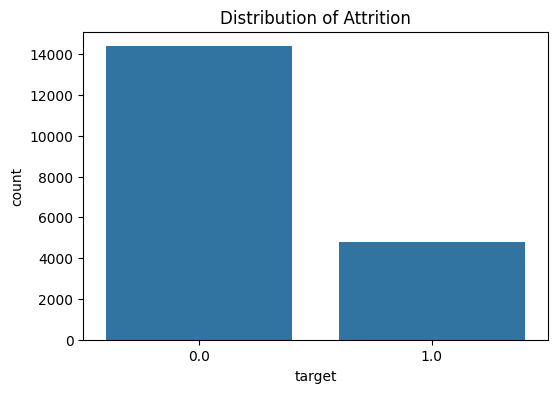

In [33]:
plt.figure(figsize=(6, 4))
sns.countplot(data=Train_Data, x='target')  
plt.title('Distribution of Attrition')
plt.show()

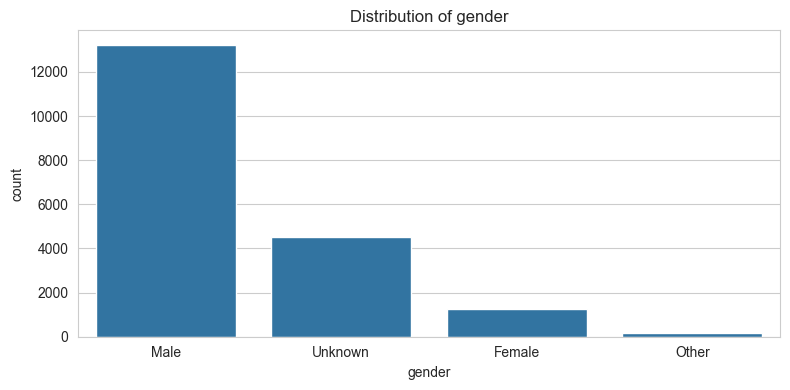

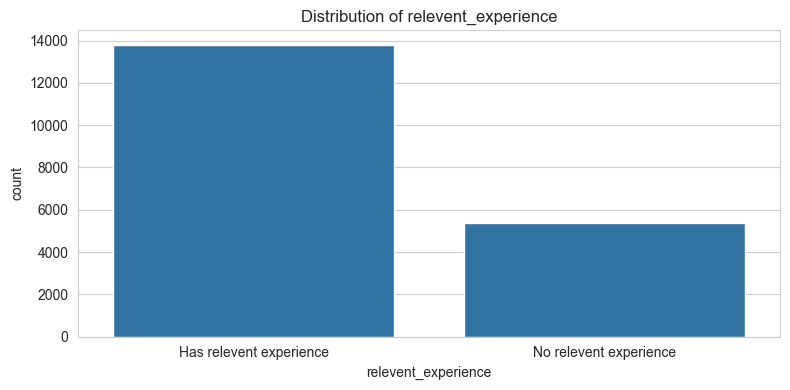

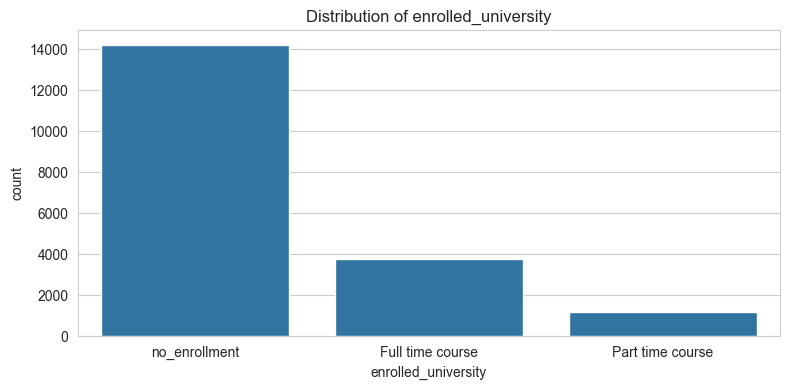

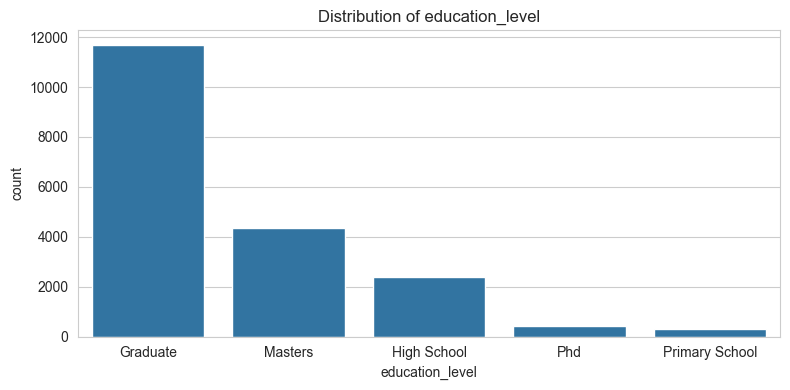

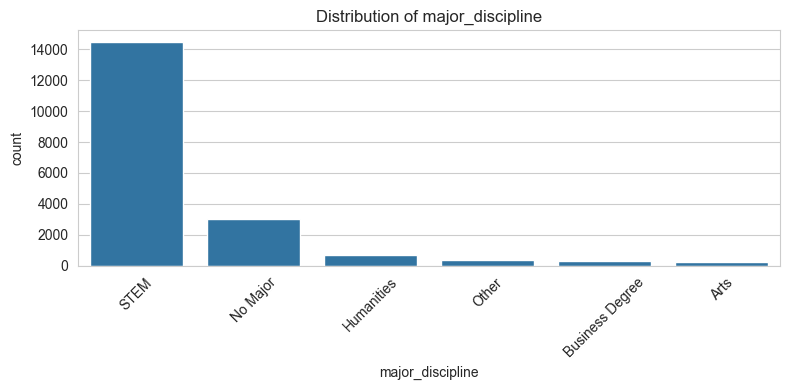

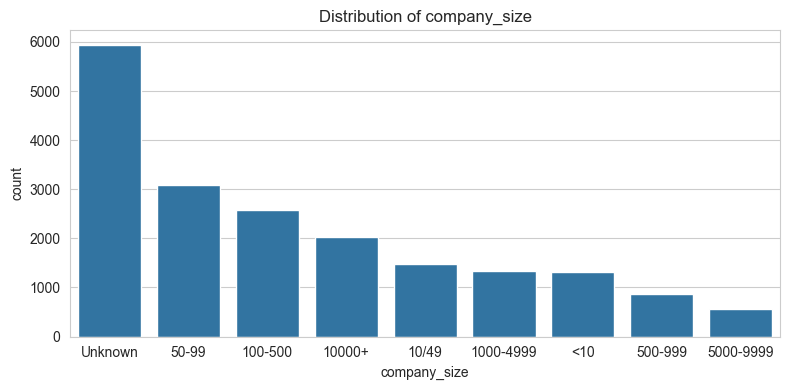

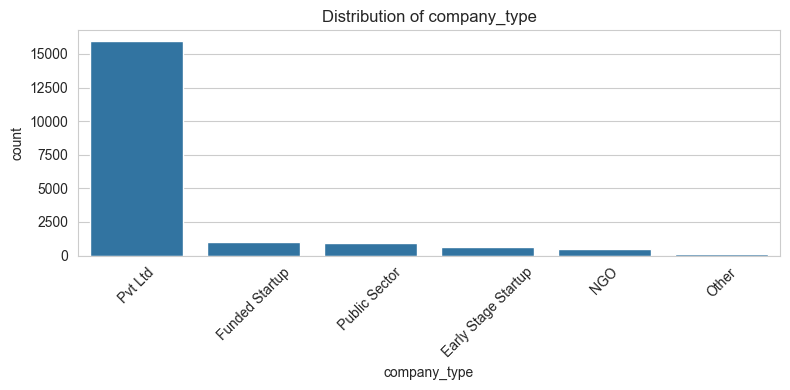

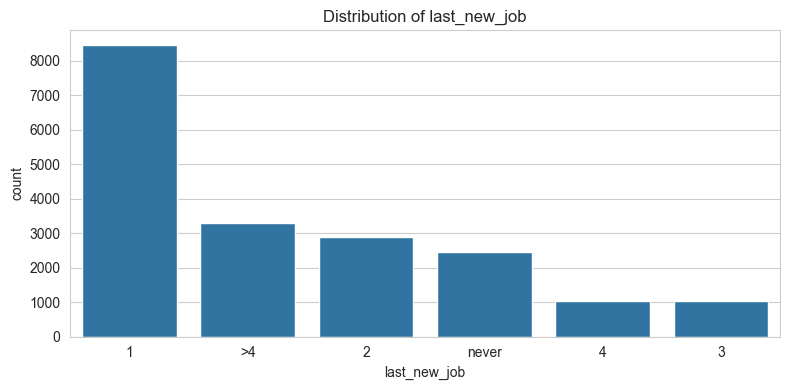

In [34]:
sns.set_style("whitegrid")

categorical_cols = ['gender', 'relevent_experience', 'enrolled_university', 
                   'education_level', 'major_discipline', 'company_size', 
                   'company_type', 'last_new_job']

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=Train_Data, x=col, order=Train_Data[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45 if col in ['company_type', 'major_discipline'] else 0)
    plt.tight_layout()
    plt.show()

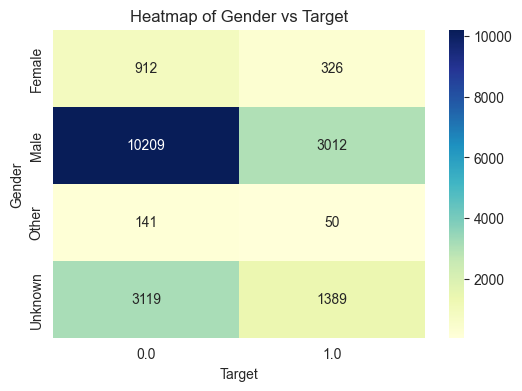

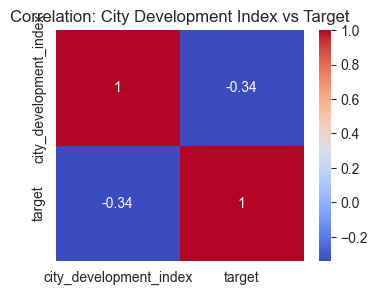

In [35]:

heatmap_data = pd.crosstab(Train_Data['gender'], Train_Data['target'])

plt.figure(figsize=(6, 4))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap of Gender vs Target')
plt.xlabel('Target')
plt.ylabel('Gender')
plt.show()

plt.figure(figsize=(4, 3))
sns.heatmap(Train_Data[['city_development_index', 'target']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation: City Development Index vs Target')
plt.show()


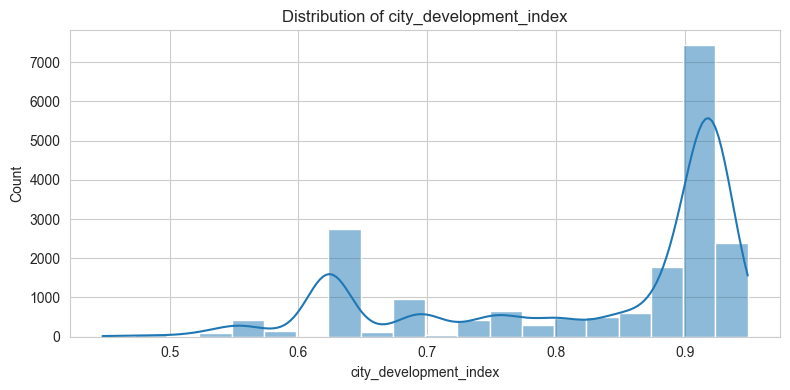

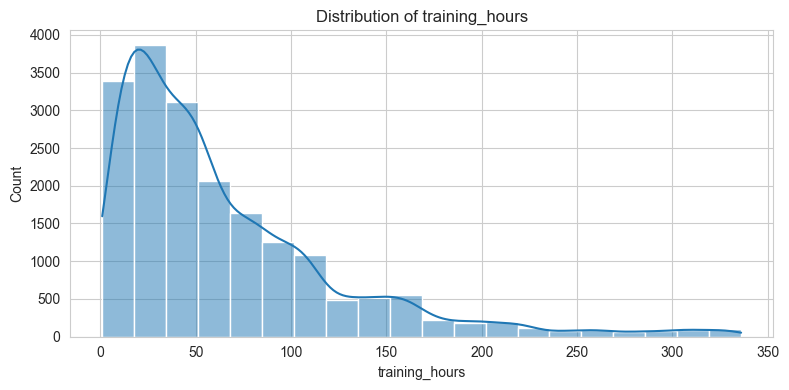

In [36]:
numerical_cols = ['city_development_index', 'training_hours']

for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=Train_Data, x=col, bins=20, kde=True)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

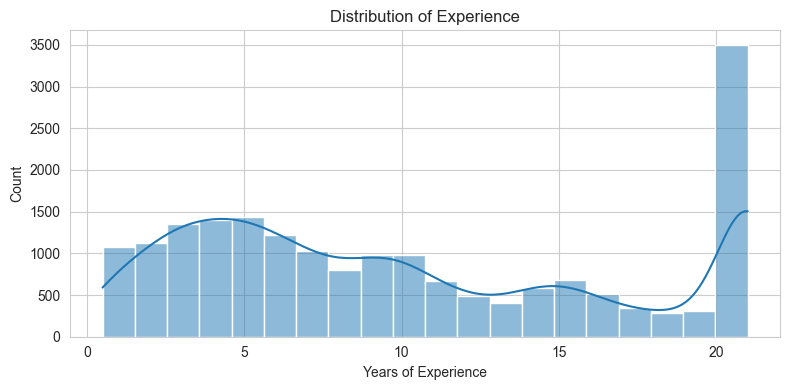

In [37]:
plt.figure(figsize=(8, 4))
sns.histplot(Train_Data['experience'], bins=20, kde=True)
plt.title('Distribution of Experience')
plt.xlabel('Years of Experience')
plt.tight_layout()
plt.show()

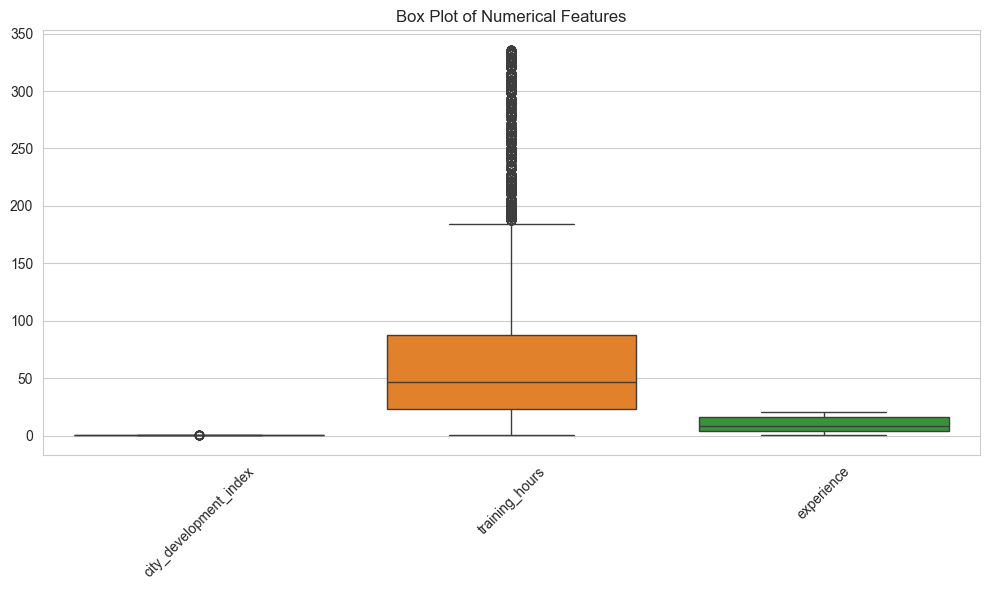

In [38]:
numerical_cols = ['city_development_index', 'training_hours', 'experience']  # update to include 'experience'

plt.figure(figsize=(10, 6))
sns.boxplot(data=Train_Data[numerical_cols])
plt.title('Box Plot of Numerical Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [39]:
numerical_cols = Train_Data.select_dtypes(include=['float64', 'int64']).columns

outlier_percentages = {}
for col in numerical_cols:
    Q1 = Train_Data[col].quantile(0.25)
    Q3 = Train_Data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((Train_Data[col] < lower_bound) | (Train_Data[col] > upper_bound)).sum()
    percentage = 100 * outliers / len(Train_Data)
    outlier_percentages[col] = percentage

outlier_df = pd.DataFrame(list(outlier_percentages.items()), columns=['Column', 'Outlier_Percentage'])
for col, pct in outlier_percentages.items():
    if col != 'target':
        print(f"Column: {col:25s} | Outlier Percentage: {pct:.2f}%")

Column: enrollee_id               | Outlier Percentage: 0.00%
Column: city_development_index    | Outlier Percentage: 0.09%
Column: experience                | Outlier Percentage: 0.00%
Column: training_hours            | Outlier Percentage: 5.14%
Column: city_encoded              | Outlier Percentage: 17.14%


In [40]:
Train_Data['cdi_experience'] = Train_Data['city_development_index'] * Train_Data['experience']
Test_Data['cdi_experience'] = Test_Data['city_development_index'] * Test_Data['experience']

In [41]:
numerical_cols = Train_Data.select_dtypes(include=['float64', 'int64']).columns

outlier_percentages = {}
for col in numerical_cols:
    Q1 = Train_Data[col].quantile(0.25)
    Q3 = Train_Data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((Train_Data[col] < lower_bound) | (Train_Data[col] > upper_bound)).sum()
    percentage = 100 * outliers / len(Train_Data)
    outlier_percentages[col] = percentage

outlier_df = pd.DataFrame(list(outlier_percentages.items()), columns=['Column', 'Outlier_Percentage'])
for col, pct in outlier_percentages.items():
    if col != 'target':
        print(f"Column: {col:25s} | Outlier Percentage: {pct:.2f}%")

Column: enrollee_id               | Outlier Percentage: 0.00%
Column: city_development_index    | Outlier Percentage: 0.09%
Column: experience                | Outlier Percentage: 0.00%
Column: training_hours            | Outlier Percentage: 5.14%
Column: city_encoded              | Outlier Percentage: 17.14%
Column: cdi_experience            | Outlier Percentage: 0.00%


In [42]:
print(Train_Data['city_development_index'].describe())
print(Train_Data['city_development_index'].isna().sum())
print((Train_Data['city_development_index'] <= -1).sum())

print(Train_Data['training_hours'].describe())
print(Train_Data['training_hours'].isna().sum())
print((Train_Data['training_hours'] < 0).sum())

print(Train_Data['city_encoded'].describe())
print(Train_Data['city_encoded'].isna().sum())
print((Train_Data['city_encoded'] <= -1).sum())

print(Train_Data['cdi_experience'].describe())
print(Train_Data['cdi_experience'].isna().sum())
print((Train_Data['cdi_experience'] <= -1).sum())

count    19158.000000
mean         0.828848
std          0.123362
min          0.448000
25%          0.740000
50%          0.903000
75%          0.920000
max          0.949000
Name: city_development_index, dtype: float64
0
0
count    19158.000000
mean        65.366896
std         60.058462
min          1.000000
25%         23.000000
50%         47.000000
75%         88.000000
max        336.000000
Name: training_hours, dtype: float64
0
0
count    19158.000000
mean         0.248441
std          0.167523
min          0.076962
25%          0.116765
50%          0.213088
75%          0.264286
max          0.595142
Name: city_encoded, dtype: float64
0
0
count    19158.000000
mean         8.688100
std          6.210342
min          0.224000
25%          3.490000
50%          7.101000
75%         13.800000
max         19.929000
Name: cdi_experience, dtype: float64
0
0


In [43]:
# Apply log1p transformation to selected columns in Train_Data and Test_Data
import numpy as np

for col in ['city_encoded', 'training_hours', 'city_development_index', 'cdi_experience']:
    if col in Train_Data.columns:
        Train_Data[col] = np.log1p(Train_Data[col])
    if col in Test_Data.columns:
        Test_Data[col] = np.log1p(Test_Data[col])

In [44]:
Train_Data['city_num'] = Train_Data['city'].str.extract(r'_(\d+)', expand=False).astype(float)
Test_Data['city_num'] = Test_Data['city'].str.extract(r'_(\d+)', expand=False).astype(float)

cat_cols = [
    'gender', 'relevent_experience', 'enrolled_university',
    'education_level', 'major_discipline', 'company_size',
    'company_type', 'last_new_job'
]

le = LabelEncoder()
for col in cat_cols:
    le.fit(list(Train_Data[col].astype(str).values) + list(Test_Data[col].astype(str).values))
    Train_Data[col] = le.transform(Train_Data[col].astype(str))
    Test_Data[col] = le.transform(Test_Data[col].astype(str))

Train_Data = Train_Data.drop(columns=['city'])
Test_Data = Test_Data.drop(columns=['city'])


In [45]:

numerical_cols = ['city_development_index', 'training_hours', 'experience', 'cdi_experience', 'city_num']

scaler = StandardScaler()
Train_Data[numerical_cols] = scaler.fit_transform(Train_Data[numerical_cols])
Test_Data[numerical_cols] = scaler.transform(Test_Data[numerical_cols])

In [46]:
numerical_cols = Train_Data.select_dtypes(include=['float64', 'int64']).columns

outlier_percentages = {}
for col in numerical_cols:
    Q1 = Train_Data[col].quantile(0.25)
    Q3 = Train_Data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((Train_Data[col] < lower_bound) | (Train_Data[col] > upper_bound)).sum()
    percentage = 100 * outliers / len(Train_Data)
    outlier_percentages[col] = percentage

outlier_df = pd.DataFrame(list(outlier_percentages.items()), columns=['Column', 'Outlier_Percentage'])
for col, pct in outlier_percentages.items():
    if col != 'target':
        print(f"Column: {col:25s} | Outlier Percentage: {pct:.2f}%")

Column: enrollee_id               | Outlier Percentage: 0.00%
Column: city_development_index    | Outlier Percentage: 0.33%
Column: experience                | Outlier Percentage: 0.00%
Column: training_hours            | Outlier Percentage: 0.55%
Column: city_encoded              | Outlier Percentage: 16.59%
Column: cdi_experience            | Outlier Percentage: 0.00%
Column: city_num                  | Outlier Percentage: 0.00%


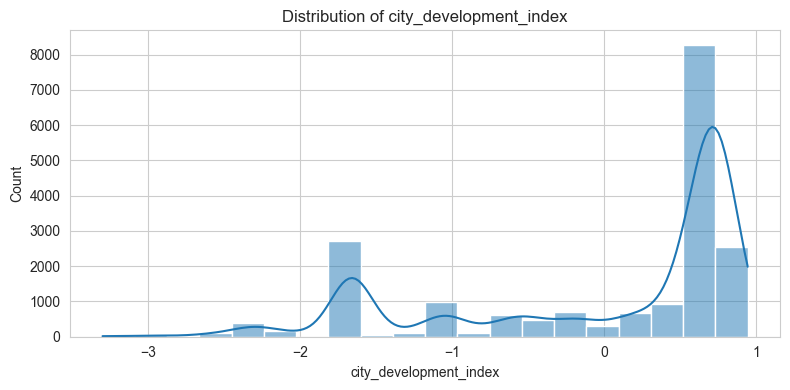

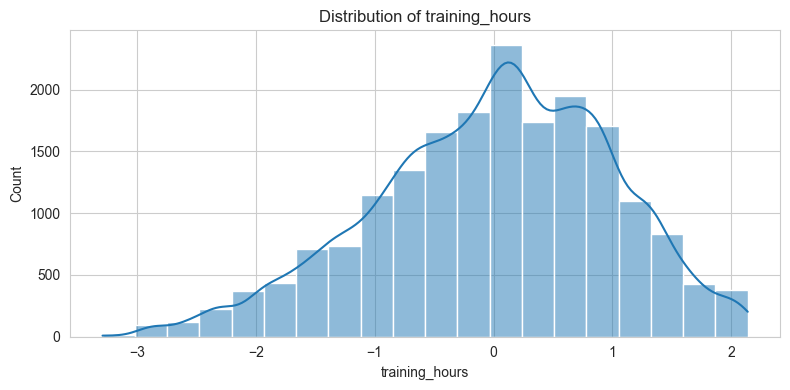

In [47]:
numerical_cols = ['city_development_index', 'training_hours']

for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=Train_Data, x=col, bins=20, kde=True)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

In [48]:
Train_Data['training_hours_bin'] = pd.qcut(Train_Data['training_hours'], q=3, labels=['Low', 'Medium', 'High'])
Train_Data = pd.get_dummies(Train_Data, columns=['training_hours_bin'], drop_first=True)

Test_Data['training_hours_bin'] = pd.qcut(Test_Data['training_hours'], q=3, labels=['Low', 'Medium', 'High'])
Test_Data = pd.get_dummies(Test_Data, columns=['training_hours_bin'], drop_first=True)


In [49]:
capping_cols = ['city_development_index', 'training_hours', 'city_encoded', 'cdi_experience']

for col in capping_cols:
    if col in Train_Data.columns:
        upper = Train_Data[col].quantile(0.95)
        lower = Train_Data[col].quantile(0.05)
        Train_Data[col] = Train_Data[col].clip(lower=lower, upper=upper)
    if col in Test_Data.columns:
        upper = Test_Data[col].quantile(0.95)
        lower = Test_Data[col].quantile(0.05)
        Test_Data[col] = Test_Data[col].clip(lower=lower, upper=upper)

In [50]:
numerical_cols = Train_Data.select_dtypes(include=['float64', 'int64']).columns

outlier_percentages = {}
for col in numerical_cols:
    Q1 = Train_Data[col].quantile(0.25)
    Q3 = Train_Data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((Train_Data[col] < lower_bound) | (Train_Data[col] > upper_bound)).sum()
    percentage = 100 * outliers / len(Train_Data)
    outlier_percentages[col] = percentage

outlier_df = pd.DataFrame(list(outlier_percentages.items()), columns=['Column', 'Outlier_Percentage'])
for col, pct in outlier_percentages.items():
    if col != 'target':
        print(f"Column: {col:25s} | Outlier Percentage: {pct:.2f}%")

Column: enrollee_id               | Outlier Percentage: 0.00%
Column: city_development_index    | Outlier Percentage: 0.00%
Column: experience                | Outlier Percentage: 0.00%
Column: training_hours            | Outlier Percentage: 0.00%
Column: city_encoded              | Outlier Percentage: 16.59%
Column: cdi_experience            | Outlier Percentage: 0.00%
Column: city_num                  | Outlier Percentage: 0.00%


In [51]:
Train_Data.head()

,enrollee_id,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,city_encoded,cdi_experience,city_num,training_hours_bin_Medium,training_hours_bin_High
0,8949,0.728839,1,0,2,0,5,1.601342,8,5,0,-0.200322,1.0,0.193170,1.317793,0.492781,True,False
1,29725,-0.384657,1,1,2,0,5,0.715746,4,5,4,0.075140,0.0,0.137929,0.683789,-0.864616,True,False
2,11561,-1.662543,3,1,0,0,5,-0.760247,8,5,5,0.667393,0.0,0.464390,-0.813301,-1.273990,False,True
3,33241,-0.280491,3,1,2,0,1,-1.424443,8,5,5,0.180010,1.0,0.325254,-1.832976,0.751333,True,False
4,666,-0.457219,1,0,2,2,5,1.601342,4,1,3,-1.696461,0.0,0.253915,1.087933,1.763994,False,False


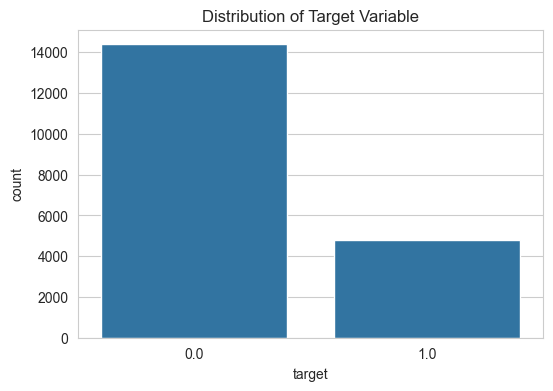

Target Distribution:
 target
0.0    0.750652
1.0    0.249348
Name: proportion, dtype: float64


In [52]:
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=Train_Data)
plt.title('Distribution of Target Variable')
plt.show()
print("Target Distribution:\n", Train_Data['target'].value_counts(normalize=True))

In [53]:
Train_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   enrollee_id                19158 non-null  int64  
 1   city_development_index     19158 non-null  float64
 2   gender                     19158 non-null  int32  
 3   relevent_experience        19158 non-null  int32  
 4   enrolled_university        19158 non-null  int32  
 5   education_level            19158 non-null  int32  
 6   major_discipline           19158 non-null  int32  
 7   experience                 19158 non-null  float64
 8   company_size               19158 non-null  int32  
 9   company_type               19158 non-null  int32  
 10  last_new_job               19158 non-null  int32  
 11  training_hours             19158 non-null  float64
 12  target                     19158 non-null  float64
 13  city_encoded               19158 non-null  flo

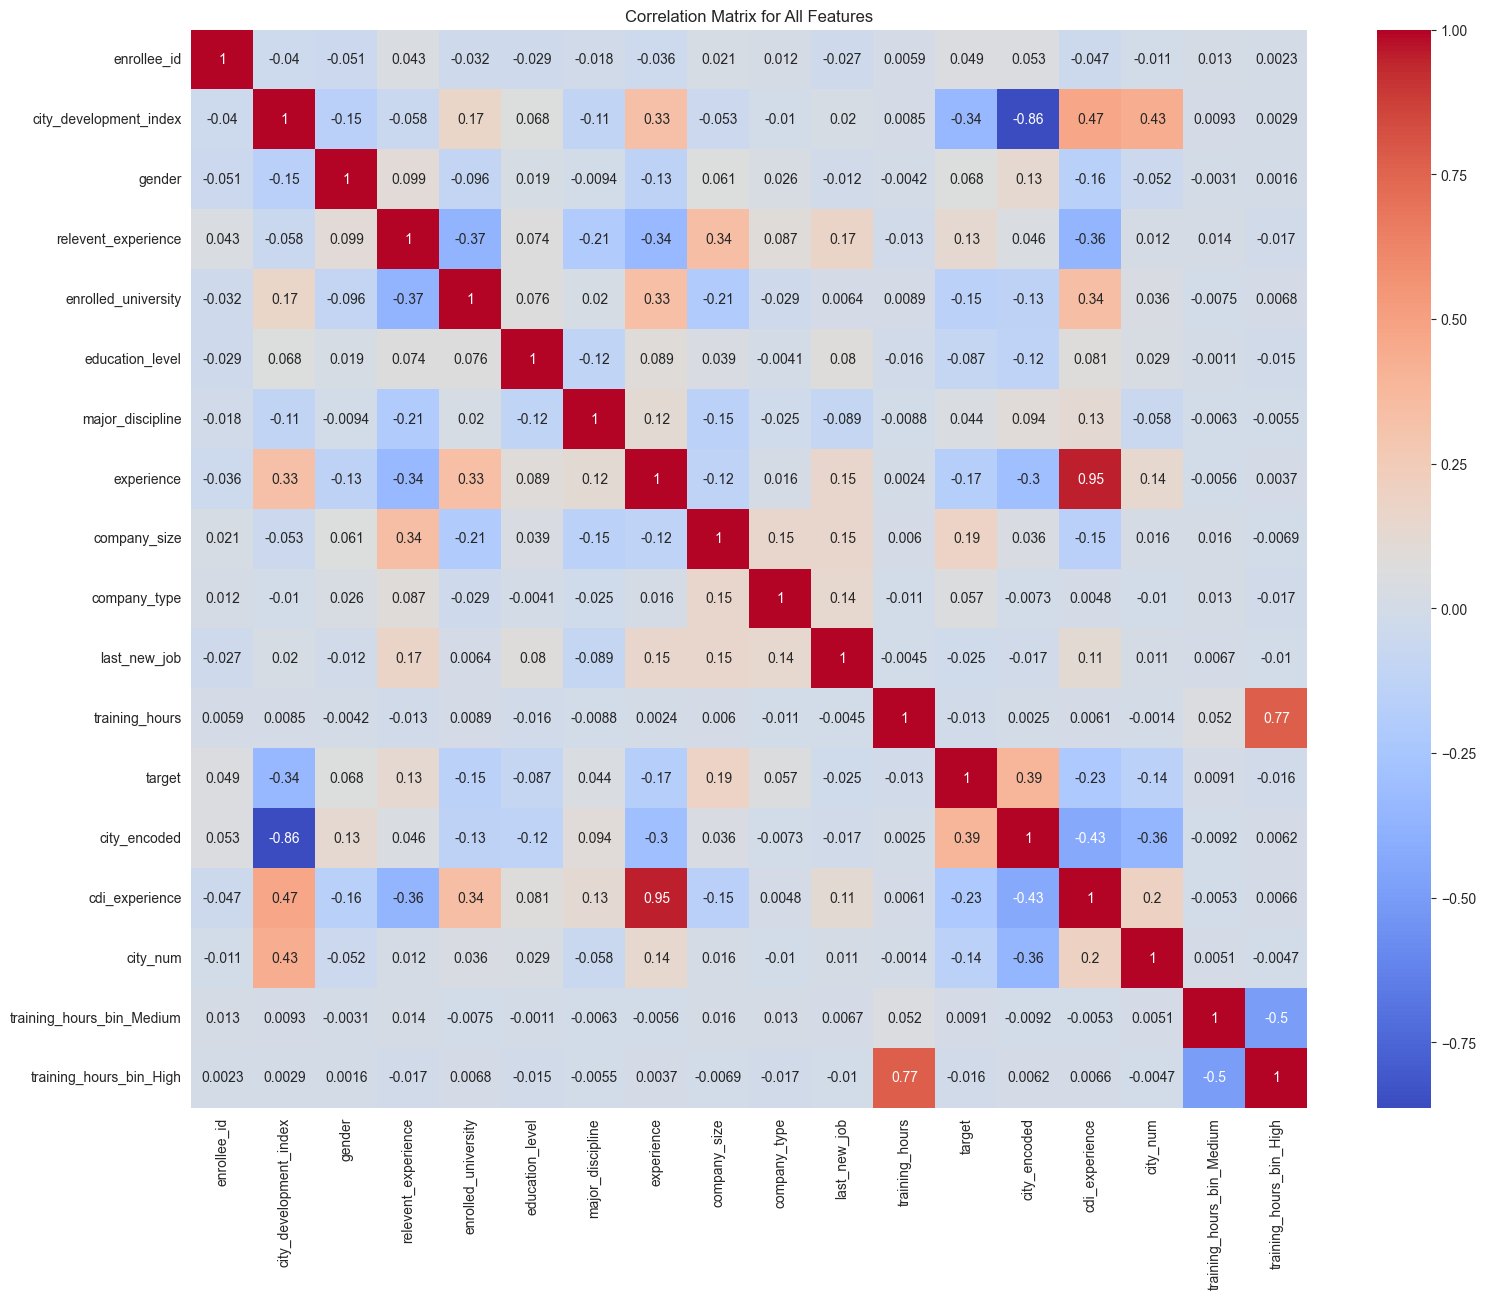

In [54]:
plt.figure(figsize=(18, 14))
sns.heatmap(Train_Data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for All Features')
plt.show()

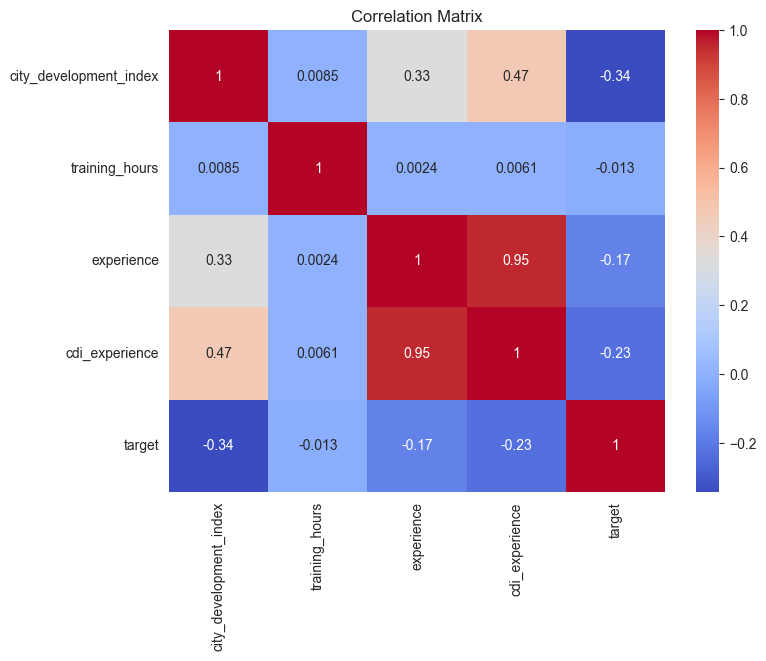

In [55]:
numerical_cols = ['city_development_index', 'training_hours', 'experience', 'cdi_experience']

plt.figure(figsize=(8, 6))
sns.heatmap(Train_Data[numerical_cols + ['target']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

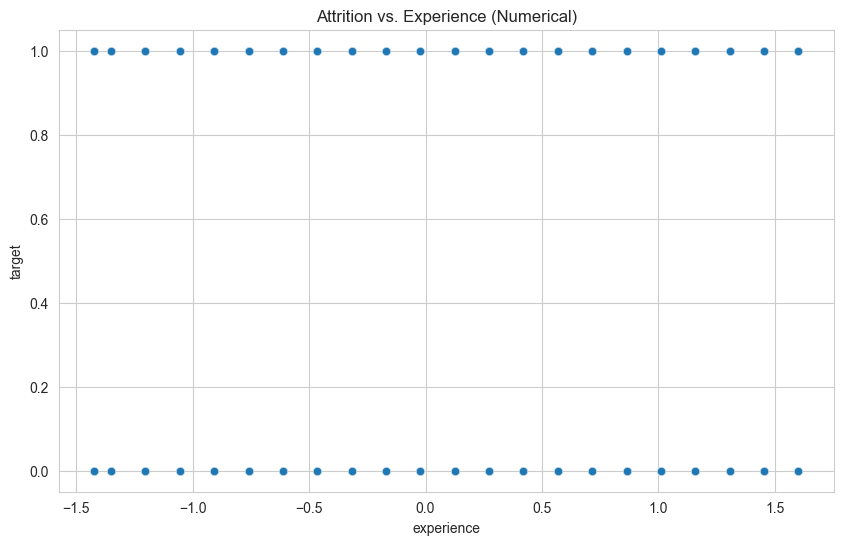

In [56]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='experience', y='target', data=Train_Data, alpha=0.5)
plt.title('Attrition vs. Experience (Numerical)')
plt.show()

In [57]:
Train_Data['training_hours'] = Train_Data['training_hours'].clip(upper=Train_Data['training_hours'].quantile(0.99))
Test_Data['training_hours'] = Test_Data['training_hours'].clip(upper=Test_Data['training_hours'].quantile(0.99))

In [58]:
X = Train_Data.drop(['enrollee_id', 'target'], axis=1)
y = Train_Data['target']

In [59]:
numerical_cols = ['city_development_index', 'training_hours', 'experience', 'cdi_experience']
categorical_cols = [
    'gender', 'relevent_experience', 'enrolled_university',
    'education_level', 'major_discipline', 'company_size',
    'company_type', 'last_new_job'
]
X_cat = Train_Data[categorical_cols]
X_num = Train_Data[numerical_cols]
X_cat = Train_Data[categorical_cols]
y = Train_Data['target']

# 1. ANOVA F-test for numerical features
anova_selector = SelectKBest(score_func=f_classif, k='all')
anova_selector.fit(X_num, y)
anova_scores = pd.Series(anova_selector.scores_, index=numerical_cols)
print("ANOVA F-test scores:\n", anova_scores.sort_values(ascending=False))

# 2. Kendall's Tau for numerical features
kendall_scores = {}
for col in numerical_cols:
    tau, _ = kendalltau(Train_Data[col], y)
    kendall_scores[col] = abs(tau)
kendall_scores = pd.Series(kendall_scores)
print("\nKendall's Tau scores:\n", kendall_scores.sort_values(ascending=False))

# 3. Chi-squared for categorical features
chi2_selector = SelectKBest(score_func=chi2, k='all')
chi2_selector.fit(X_cat, y)
chi2_scores = pd.Series(chi2_selector.scores_, index=categorical_cols)
print("\nChi-squared scores:\n", chi2_scores.sort_values(ascending=False))

# 4. Mutual Information for categorical features
mi_selector = SelectKBest(score_func=mutual_info_classif, k='all')
mi_selector.fit(X_cat, y)
mi_scores = pd.Series(mi_selector.scores_, index=categorical_cols)
print("\nMutual Information scores:\n", mi_scores.sort_values(ascending=False))

ANOVA F-test scores:
 city_development_index    2543.625978
cdi_experience            1053.480168
experience                 596.769570
training_hours               3.326317
dtype: float64

Kendall's Tau scores:
 city_development_index    0.241188
cdi_experience            0.182800
experience                0.153235
training_hours            0.011643
dtype: float64

Chi-squared scores:
 company_size           1184.327782
relevent_experience     227.490477
education_level         199.895182
enrolled_university     177.481258
gender                   52.225615
last_new_job             25.669298
company_type             23.065531
major_discipline         10.547172
dtype: float64

Mutual Information scores:
 company_size           0.030825
enrolled_university    0.011423
last_new_job           0.005629
company_type           0.005121
relevent_experience    0.004996
education_level        0.004308
gender                 0.004139
major_discipline       0.003429
dtype: float64


In [60]:
N_TOP_FEATURES = 12 

feature_scores = pd.DataFrame({
    'anova': anova_scores,
    'kendall': kendall_scores,
    'chi2': chi2_scores,
    'mutual_info': mi_scores
})

feature_scores_norm = feature_scores.apply(lambda x: (x - x.min()) / (x.max() - x.min()))

feature_scores_norm['total'] = feature_scores_norm.sum(axis=1)

best_features = feature_scores_norm['total'].sort_values(ascending=False).head(N_TOP_FEATURES).index.tolist()

X = Train_Data[best_features]

In [61]:
X.columns

Index(['city_development_index', 'company_size', 'cdi_experience',
       'experience', 'enrolled_university', 'relevent_experience',
       'education_level', 'last_new_job', 'company_type', 'gender',
       'major_discipline', 'training_hours'],
      dtype='object')

In [62]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [63]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Class Distribution Before SMOTE:\n", y_train.value_counts(normalize=True))
print("Class Distribution After SMOTE:\n", pd.Series(y_train_res).value_counts(normalize=True))

Class Distribution Before SMOTE:
 target
0.0    0.75062
1.0    0.24938
Name: proportion, dtype: float64
Class Distribution After SMOTE:
 target
0.0    0.5
1.0    0.5
Name: proportion, dtype: float64


XGBoost Validation Accuracy: 0.7836638830897703
XGBoost Validation ROC AUC: 0.7932765187704615
XGBoost Training Accuracy: 0.8926660576797599
XGBoost Training ROC AUC: 0.9454073012804136
XGBoost Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      0.87      0.86      2877
         1.0       0.57      0.53      0.55       955

    accuracy                           0.78      3832
   macro avg       0.71      0.70      0.70      3832
weighted avg       0.78      0.78      0.78      3832

XGBoost Confusion Matrix:
 [[2499  378]
 [ 451  504]]


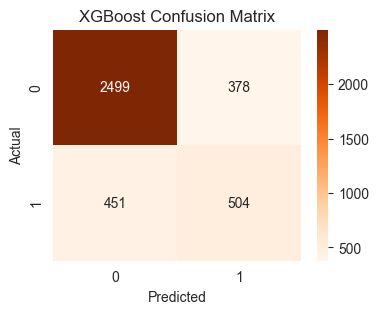

In [65]:
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_val)
y_pred_proba_xgb = xgb_model.predict_proba(X_val)[:, 1]
y_pred_train_xgb = xgb_model.predict(X_train)
y_pred_proba_train_xgb = xgb_model.predict_proba(X_train)[:, 1]

print("XGBoost Validation Accuracy:", accuracy_score(y_val, y_pred_xgb))
print("XGBoost Validation ROC AUC:", roc_auc_score(y_val, y_pred_proba_xgb))
print("XGBoost Training Accuracy:", accuracy_score(y_train, y_pred_train_xgb))
print("XGBoost Training ROC AUC:", roc_auc_score(y_train, y_pred_proba_train_xgb))
print("XGBoost Classification Report:\n", classification_report(y_val, y_pred_xgb))

cm_xgb = confusion_matrix(y_val, y_pred_xgb)
print("XGBoost Confusion Matrix:\n", cm_xgb)
plt.figure(figsize=(4,3))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Oranges')
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

joblib.dump(xgb_model, 'pkl_models/xgboost_model.pkl')

results = {}
results['XGBoost'] = {
    'accuracy': accuracy_score(y_val, y_pred_xgb),
    'roc_auc': roc_auc_score(y_val, y_pred_proba_xgb),
    'train_accuracy': accuracy_score(y_train, y_pred_train_xgb),
    'train_roc_auc': roc_auc_score(y_train, y_pred_proba_train_xgb),
    'classification_report': classification_report(y_val, y_pred_xgb, output_dict=True),
    'confusion_matrix': cm_xgb
}

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[LightGBM] [Info] Number of positive: 3822, number of negative: 11504
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000660 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 553
[LightGBM] [Info] Number of data points in the train set: 15326, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
LightGBM Best Params: {'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 100, 'num_leaves': 15}
LightGBM Validation Accuracy: 0.7901878914405011
LightGBM Validation ROC AUC: 0.8145976302394692
LightGBM Training Accuracy: 0.7911392405063291
LightGBM Training ROC AUC: 0.8302101846676406
LightGBM Classification Report:
               precision    recall  f1-score   support

     

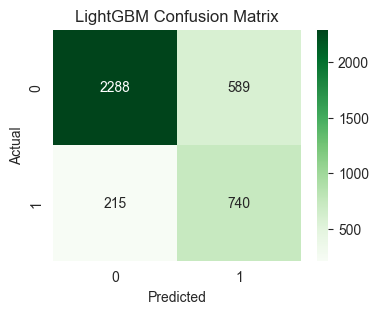

In [66]:

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5, 7],
    'num_leaves': [15, 31, 63]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

lgbm = LGBMClassifier(random_state=42, class_weight='balanced')

grid_search = GridSearchCV(
    estimator=lgbm,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=cv,
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train, y_train)

best_lgbm = grid_search.best_estimator_

y_pred_lgbm = best_lgbm.predict(X_val)
y_pred_proba_lgbm = best_lgbm.predict_proba(X_val)[:, 1]
y_pred_train_lgbm = best_lgbm.predict(X_train)
y_pred_proba_train_lgbm = best_lgbm.predict_proba(X_train)[:, 1]

print("LightGBM Best Params:", grid_search.best_params_)
print("LightGBM Validation Accuracy:", accuracy_score(y_val, y_pred_lgbm))
print("LightGBM Validation ROC AUC:", roc_auc_score(y_val, y_pred_proba_lgbm))
print("LightGBM Training Accuracy:", accuracy_score(y_train, y_pred_train_lgbm))
print("LightGBM Training ROC AUC:", roc_auc_score(y_train, y_pred_proba_train_lgbm))
print("LightGBM Classification Report:\n", classification_report(y_val, y_pred_lgbm))

cm_lgbm = confusion_matrix(y_val, y_pred_lgbm)
print("LightGBM Confusion Matrix:\n", cm_lgbm)
plt.figure(figsize=(4,3))
sns.heatmap(cm_lgbm, annot=True, fmt='d', cmap='Greens')
plt.title('LightGBM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

joblib.dump(best_lgbm, 'pkl_models/lightgbm_model.pkl')
results['LightGBM'] = {
    'accuracy': accuracy_score(y_val, y_pred_lgbm),
    'roc_auc': roc_auc_score(y_val, y_pred_proba_lgbm),
    'train_accuracy': accuracy_score(y_train, y_pred_train_lgbm),
    'train_roc_auc': roc_auc_score(y_train, y_pred_proba_train_lgbm),
    'classification_report': classification_report(y_val, y_pred_lgbm, output_dict=True),
    'confusion_matrix': cm_lgbm,
    'best_params': grid_search.best_params_
}

Logistic Regression Validation Accuracy: 0.7160751565762005
Logistic Regression Validation ROC AUC: 0.7683587288242006
Logistic Regression Training Accuracy: 0.7157118621949629
Logistic Regression Training ROC AUC: 0.7566080239467137
Logistic Regression Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.72      0.79      2877
         1.0       0.46      0.72      0.56       955

    accuracy                           0.72      3832
   macro avg       0.67      0.72      0.67      3832
weighted avg       0.78      0.72      0.73      3832

Logistic Regression Confusion Matrix:
 [[2059  818]
 [ 270  685]]


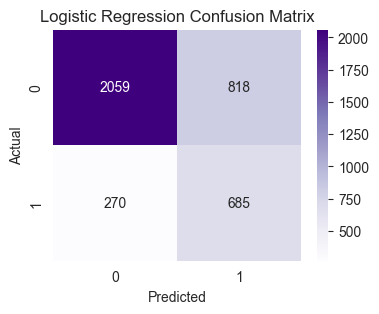

In [67]:
logreg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_val)
y_pred_proba_logreg = logreg.predict_proba(X_val)[:, 1]
y_pred_train_logreg = logreg.predict(X_train)
y_pred_proba_train_logreg = logreg.predict_proba(X_train)[:, 1]

print("Logistic Regression Validation Accuracy:", accuracy_score(y_val, y_pred_logreg))
print("Logistic Regression Validation ROC AUC:", roc_auc_score(y_val, y_pred_proba_logreg))
print("Logistic Regression Training Accuracy:", accuracy_score(y_train, y_pred_train_logreg))
print("Logistic Regression Training ROC AUC:", roc_auc_score(y_train, y_pred_proba_train_logreg))
print("Logistic Regression Classification Report:\n", classification_report(y_val, y_pred_logreg))

cm_logreg = confusion_matrix(y_val, y_pred_logreg)
print("Logistic Regression Confusion Matrix:\n", cm_logreg)
plt.figure(figsize=(4,3))
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Purples')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

joblib.dump(logreg, 'pkl_models/logistic_model.pkl')

results['LogisticRegression'] = {
    'accuracy': accuracy_score(y_val, y_pred_logreg),
    'roc_auc': roc_auc_score(y_val, y_pred_proba_logreg),
    'train_accuracy': accuracy_score(y_train, y_pred_train_logreg),
    'train_roc_auc': roc_auc_score(y_train, y_pred_proba_train_logreg),
    'classification_report': classification_report(y_val, y_pred_logreg, output_dict=True),
    'confusion_matrix': cm_logreg
}

SVC Accuracy: 0.7150313152400835
SVC ROC AUC: 0.7958530100617464
SVC Confusion Matrix:
 [[1965  912]
 [ 180  775]]


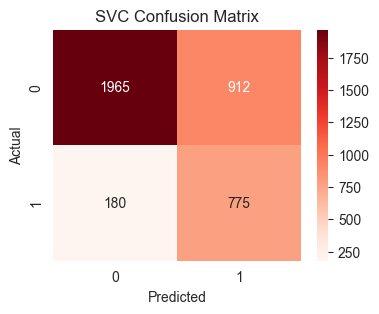

In [68]:
svc = SVC(probability=True, class_weight='balanced', random_state=42)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_val)
y_pred_proba_svc = svc.predict_proba(X_val)[:, 1]

cm_svc = confusion_matrix(y_val, y_pred_svc)
print("SVC Accuracy:", accuracy_score(y_val, y_pred_svc))
print("SVC ROC AUC:", roc_auc_score(y_val, y_pred_proba_svc))
print("SVC Confusion Matrix:\n", cm_svc)
plt.figure(figsize=(4,3))
sns.heatmap(cm_svc, annot=True, fmt='d', cmap='Reds')
plt.title('SVC Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

results['SVC'] = {
    'accuracy': accuracy_score(y_val, y_pred_svc),
    'roc_auc': roc_auc_score(y_val, y_pred_proba_svc),
    'classification_report': classification_report(y_val, y_pred_svc, output_dict=True),
    'confusion_matrix': cm_svc
}

Validation Accuracy: 0.7789665970772442
Validation ROC AUC: 0.8005277457793988
Training Accuracy: 0.9981730392796555
Training ROC AUC: 0.9998840641691575
Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      0.89      0.86      2877
         1.0       0.57      0.45      0.50       955

    accuracy                           0.78      3832
   macro avg       0.70      0.67      0.68      3832
weighted avg       0.76      0.78      0.77      3832



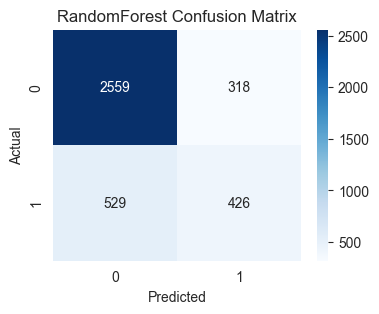

In [69]:
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_val)
y_pred_proba = rf_model.predict_proba(X_val)[:, 1]
y_pred_train = rf_model.predict(X_train)
y_pred_proba_train = rf_model.predict_proba(X_train)[:, 1]

print("Validation Accuracy:", accuracy_score(y_val, y_pred))
print("Validation ROC AUC:", roc_auc_score(y_val, y_pred_proba))
print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
print("Training ROC AUC:", roc_auc_score(y_train, y_pred_proba_train))
print("Classification Report:\n", classification_report(y_val, y_pred))

cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('RandomForest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

results = {}
results['RandomForest'] = {
    'accuracy': accuracy_score(y_val, y_pred),
    'roc_auc': roc_auc_score(y_val, y_pred_proba),
    'train_accuracy': accuracy_score(y_train, y_pred_train),
    'train_roc_auc': roc_auc_score(y_train, y_pred_proba_train),
    'classification_report': classification_report(y_val, y_pred, output_dict=True),
    'confusion_matrix': cm
}


Neural Network (MLP) Accuracy: 0.7755741127348643
Neural Network (MLP) ROC AUC: 0.778485988349557
Neural Network (MLP) Confusion Matrix:
 [[2508  369]
 [ 491  464]]


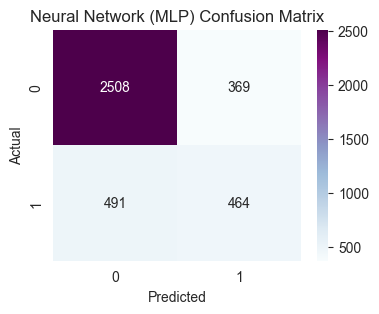

In [70]:
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=300, random_state=42)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_val)
y_pred_proba_mlp = mlp.predict_proba(X_val)[:, 1]

cm_mlp = confusion_matrix(y_val, y_pred_mlp)
print("Neural Network (MLP) Accuracy:", accuracy_score(y_val, y_pred_mlp))
print("Neural Network (MLP) ROC AUC:", roc_auc_score(y_val, y_pred_proba_mlp))
print("Neural Network (MLP) Confusion Matrix:\n", cm_mlp)
plt.figure(figsize=(4,3))
sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='BuPu')
plt.title('Neural Network (MLP) Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

joblib.dump(mlp, 'pkl_models/mlp_model.pkl')
results['NeuralNetwork'] = {
    'accuracy': accuracy_score(y_val, y_pred_mlp),
    'roc_auc': roc_auc_score(y_val, y_pred_proba_mlp),
    'classification_report': classification_report(y_val, y_pred_mlp, output_dict=True),
    'confusion_matrix': cm_mlp
}

=== Model Ranking by ROC AUC ===
           Model  Accuracy   ROC_AUC
0   RandomForest  0.778967  0.800528
1  NeuralNetwork  0.775574  0.778486


C:\Users\Ali Madian\AppData\Local\Temp\ipykernel_21064\3315549390.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ROC_AUC', y='Model', data=report_df, palette='viridis')


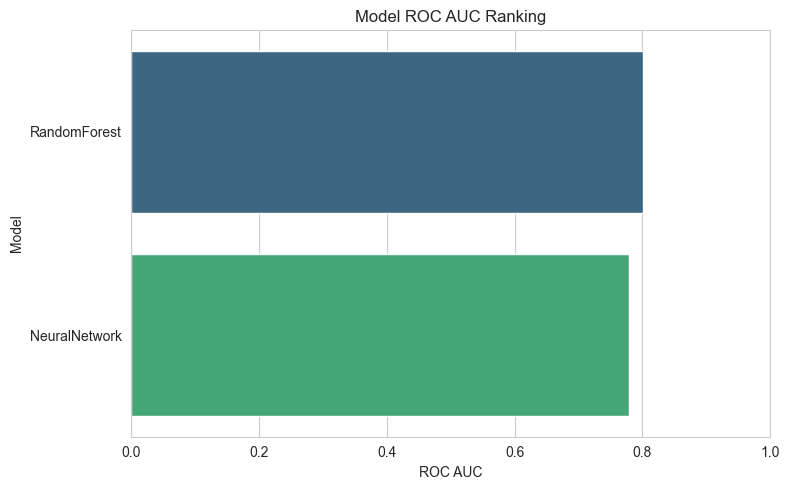

C:\Users\Ali Madian\AppData\Local\Temp\ipykernel_21064\3315549390.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Model', data=report_df, palette='magma')


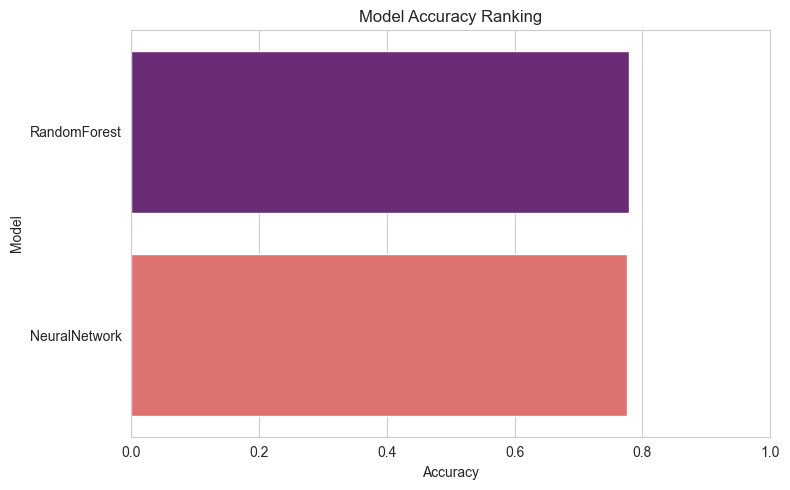


=== Detailed Evaluation Reports ===

--- RandomForest ---
Validation Accuracy: 0.7790
Validation ROC AUC: 0.8005
Train Accuracy: 0.9982
Train ROC AUC: 0.9999
Accuracy Difference (Train - Validation): 0.2192
ROC AUC Difference (Train - Validation): 0.1994
Classification Report:
              precision    recall  f1-score      support
0.0            0.828692  0.889468  0.858005  2877.000000
1.0            0.572581  0.446073  0.501471   955.000000
accuracy       0.778967  0.778967  0.778967     0.778967
macro avg      0.700636  0.667771  0.679738  3832.000000
weighted avg   0.764864  0.778967  0.769151  3832.000000
Confusion Matrix:
[[2559  318]
 [ 529  426]]

--- NeuralNetwork ---
Validation Accuracy: 0.7756
Validation ROC AUC: 0.7785
Classification Report:
              precision    recall  f1-score      support
0.0            0.836279  0.871741  0.853642  2877.000000
1.0            0.557023  0.485864  0.519016   955.000000
accuracy       0.775574  0.775574  0.775574     0.775574
macro

In [71]:

report_rows = []
for model_name, metrics in results.items():
    report_rows.append({
        'Model': model_name,
        'Accuracy': metrics['accuracy'],
        'ROC_AUC': metrics['roc_auc']
    })

report_df = pd.DataFrame(report_rows)
report_df = report_df.sort_values(by='ROC_AUC', ascending=False).reset_index(drop=True)

print("=== Model Ranking by ROC AUC ===")
print(report_df)

plt.figure(figsize=(8, 5))
sns.barplot(x='ROC_AUC', y='Model', data=report_df, palette='viridis')
plt.title('Model ROC AUC Ranking')
plt.xlabel('ROC AUC')
plt.ylabel('Model')
plt.xlim(0, 1)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
sns.barplot(x='Accuracy', y='Model', data=report_df, palette='magma')
plt.title('Model Accuracy Ranking')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.xlim(0, 1)
plt.tight_layout()
plt.show()

print("\n=== Detailed Evaluation Reports ===")
for idx, row in report_df.iterrows():
    model_name = row['Model']
    print(f"\n--- {model_name} ---")
    print(f"Validation Accuracy: {results[model_name]['accuracy']:.4f}")
    print(f"Validation ROC AUC: {results[model_name]['roc_auc']:.4f}")
    if 'train_accuracy' in results[model_name]:
        print(f"Train Accuracy: {results[model_name]['train_accuracy']:.4f}")
    if 'train_roc_auc' in results[model_name]:
        print(f"Train ROC AUC: {results[model_name]['train_roc_auc']:.4f}")
    if 'train_accuracy' in results[model_name]:
        print(f"Accuracy Difference (Train - Validation): {results[model_name]['train_accuracy'] - results[model_name]['accuracy']:.4f}")
    if 'train_roc_auc' in results[model_name]:
        print(f"ROC AUC Difference (Train - Validation): {results[model_name]['train_roc_auc'] - results[model_name]['roc_auc']:.4f}")
    print("Classification Report:")
    print(pd.DataFrame(results[model_name]['classification_report']).T)
    print("Confusion Matrix:")
    print(results[model_name]['confusion_matrix'])
    if 'best_params' in results[model_name]:
        print("Best Params:", results[model_name]['best_params'])